<a href="https://colab.research.google.com/github/IT24102008/PG151MLProject/blob/main/IT24102008_Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, auc)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import warnings
import joblib  # For saving the model

# IT24102008 - Random Forest Model for predicting The possibility of having a Stroke.

#### Load the data



In [3]:
import pandas as pd

df = pd.read_csv("/content/preprocessed_stroke_data.csv")
display(df.head())

,0,1,2,3,4,5,6,7,8,9,stroke
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238,1
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852,1
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570,1
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929,1
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121,1


#### Prepare the data

In [4]:
X = df.drop('stroke', axis=1)
y = df['stroke']
display(X.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121


,stroke
0,1
1,1
2,1
3,1
4,1


#### Split the data

Split the data into training and testing sets to evaluate the model's performance on unseen data.


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4088, 10)
X_test shape: (1022, 10)
y_train shape: (4088,)
y_test shape: (1022,)


## Train the model - Random Forest


In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Use the trained model to make predictions on the test data.


In [7]:
y_pred = model.predict(X_test)

Evaluate the performance of the model using appropriate metrics :- accuracy, precision, recall, and F1-score.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9384
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


* The precision, recall, and F1-score were all 0.0000, indicating that the model did not correctly identify any of the positive cases (stroke) in the test set.


### Demonstrate Overfitting

We have to revise and update the model to get correct values for. Lets add some Hyperparameters.


Dataset Information:
  Total samples: 5110
  Total features: 11

Class Distribution:
stroke
0    4861
1     249
Name: count, dtype: int64

Class Balance Ratio:
  No Stroke (0): 4861 (95.13%)
  Stroke (1): 249 (4.87%)
  Imbalance Ratio: 19.52:1

✓ Class distribution plot saved as 'class_distribution.png'


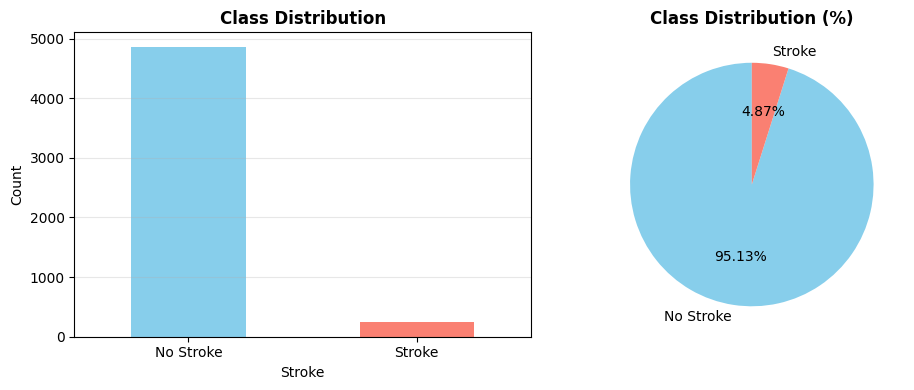

In [8]:
print(f"\nDataset Information:")
print(f"  Total samples: {len(df)}")
print(f"  Total features: {df.shape[1] - 1}")

print(f"\nClass Distribution:")
class_dist = df['stroke'].value_counts()
print(class_dist)
print(f"\nClass Balance Ratio:")
print(f"  No Stroke (0): {class_dist[0]} ({class_dist[0]/len(df)*100:.2f}%)")
print(f"  Stroke (1): {class_dist[1]} ({class_dist[1]/len(df)*100:.2f}%)")
print(f"  Imbalance Ratio: {class_dist[0]/class_dist[1]:.2f}:1")

# Visualize class distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
class_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution', fontweight='bold')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Stroke', 'Stroke'], rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(class_dist, labels=['No Stroke', 'Stroke'], autopct='%1.2f%%',
        colors=['skyblue', 'salmon'], startangle=90)
plt.title('Class Distribution (%)', fontweight='bold')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
print("\n✓ Class distribution plot saved as 'class_distribution.png'")
plt.show()

# **Random** **Forest Model 2 - Revised.**

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Train-test split complete (80-20 split with stratification)")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest set class distribution:")
print(pd.Series(y_test).value_counts())


Features (X) shape: (5110, 10)
Target (y) shape: (5110,)

✓ Train-test split complete (80-20 split with stratification)
  Training samples: 4088
  Testing samples: 1022

Training set class distribution:
stroke
0    3889
1     199
Name: count, dtype: int64

Test set class distribution:
stroke
0    972
1     50
Name: count, dtype: int64


Check Over fitting

In [ ]:
def check_overfitting_underfitting(model, X_train, y_train, X_test, y_test, model_name):
    """
    Comprehensive function to check for overfitting and underfitting
    """
    print("\n" + "-"*70)
    print(f"OVERFITTING/UNDERFITTING ANALYSIS - {model_name}")
    print("-"*70)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"✓ SMOTE applied successfully")
print(f"  Original training samples: {X_train.shape[0]}")
print(f"  After SMOTE: {X_train_smote.shape[0]}")
print(f"\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

model_v2 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

print("\n✓ Training Variant 2...")
model_v2.fit(X_train_smote, y_train_smote)
print("✓ Training complete!")

# Check overfitting/underfitting
results_v2 = check_overfitting_underfitting(
    model_v2, X_train_smote, y_train_smote, X_test, y_test, "Variant 2 (SMOTE)")

✓ SMOTE applied successfully
  Original training samples: 4088
  After SMOTE: 7778

Class distribution after SMOTE:
stroke
0    3889
1    3889
Name: count, dtype: int64

✓ Training Variant 2...
✓ Training complete!

----------------------------------------------------------------------
OVERFITTING/UNDERFITTING ANALYSIS - Variant 2 (SMOTE)
----------------------------------------------------------------------


### Evaluate Model 2

Evaluate the performance of `model_v2` using appropriate metrics.

In [ ]:
y_pred_v2 = model_v2.predict(X_test)

accuracy_v2 = accuracy_score(y_test, y_pred_v2)
precision_v2 = precision_score(y_test, y_pred_v2)
recall_v2 = recall_score(y_test, y_pred_v2)
f1_v2 = f1_score(y_test, y_pred_v2)

print("Model 2 (SMOTE) Test Set Metrics:")
print(f"Accuracy: {accuracy_v2:.4f}")
print(f"Precision: {precision_v2:.4f}")
print(f"Recall: {recall_v2:.4f}")
print(f"F1-score: {f1_v2:.4f}")

Model 2 (SMOTE) Test Set Metrics:
Accuracy: 0.9002
Precision: 0.1061
Recall: 0.1400
F1-score: 0.1207


1. Precision: 0.1061 (10.6%)

* Only 10.6% of predicted strokes are actually strokes

* 89.4% are false alarms
* This means if the model predicts stroke for 100 patients, only ~11 actually have strokes


2. Recall: 0.1400 (14%)

* Only catching 14% of actual stroke cases
* Missing 86% of stroke patients - This is dangerous!


3. High Accuracy (90%) is misleading

* Just predicting "No Stroke" for everyone gives 95% accuracy
* Accuracy isn't meaningful with imbalanced data

#**Random Forest Model 3 - Revised**

In [ ]:
print("="*70)
print("IMPROVED MODEL - With Class Weights")
print("="*70)

# This time we Train with class weights
model_v3 = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Automatically adjust weights
    random_state=42,
    n_jobs=-1
)

print("\n✓ Training improved model with balanced class weights...")
model_v3.fit(X_train_smote, y_train_smote)
print("✓ Training complete!")

# Evaluate
y_pred_v3 = model_v3.predict(X_test)
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
precision_v3 = precision_score(y_test, y_pred_v3)
recall_v3 = recall_score(y_test, y_pred_v3)
f1_v3 = f1_score(y_test, y_pred_v3)

print("\nModel 3 (Improved) Test Set Metrics:")
print(f"Accuracy:  {accuracy_v3:.4f}")
print(f"Precision: {precision_v3:.4f}")
print(f"Recall:    {recall_v3:.4f}")
print(f"F1-score:  {f1_v3:.4f}")

IMPROVED MODEL - With Class Weights

✓ Training improved model with balanced class weights...
✓ Training complete!

Model 3 (Improved) Test Set Metrics:
Accuracy:  0.8640
Precision: 0.1440
Recall:    0.3600
F1-score:  0.2057


# **Random Forest Model 4**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_res, y_train_res)

y_proba = rf.predict_proba(X_test)[:, 1]
threshold = 0.3  # Lowering threshold improves recall
y_pred = (y_proba >= threshold).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Improved Random Forest Results ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

=== Improved Random Forest Results ===
Accuracy : 0.7270
Precision: 0.1246
Recall   : 0.7600
F1-score : 0.2141

Detailed Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       972
           1       0.12      0.76      0.21        50

    accuracy                           0.73      1022
   macro avg       0.55      0.74      0.52      1022
weighted avg       0.94      0.73      0.80      1022



# **Random Forest Model 5 - Final Model**

In [9]:
print("="*70)
print("IT24102008 - RANDOM FOREST MODEL FOR STROKE PREDICTION Final Model")
print("="*70)

# Load the preprocessed data
df = pd.read_csv("/content/preprocessed_stroke_data.csv")
print("Dataset Head:")
display(df.head())

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



IT24102008 - RANDOM FOREST MODEL FOR STROKE PREDICTION Final Model
Dataset Head:


,0,1,2,3,4,5,6,7,8,9,stroke
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238,1
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852,1
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570,1
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929,1
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121,1


In [10]:
# Handle class imbalance using SMOTEENN (combination of over and under sampling)
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

print("\nClass distribution after resampling:")
print(y_train_res.value_counts())

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}




Class distribution after resampling:
stroke
1    3738
0    3171
Name: count, dtype: int64


In [9]:
# Perform GridSearchCV for hyperparameter tuning with 5-fold CV, focusing on recall for imbalanced data
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)

# Get the best model and parameters
best_rf_model = grid_search.best_estimator_
print("\nBest hyperparameters found:")
print(grid_search.best_params_)

# Use pre-selected hyperparameters
# best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5,
#                                        min_samples_leaf=2, bootstrap=True, class_weight='balanced',
#                                        random_state=42)

# Cross-validation scores on resampled training data
cv_scores = cross_val_score(best_rf_model, X_train_res, y_train_res, cv=5, scoring='recall')
print("\nCross-Validation Recall Scores:", cv_scores)
print("Mean CV Recall:", cv_scores.mean())



NameError: name 'rf_model' is not defined

In [34]:
from tqdm import tqdm

# Load and preprocess data (as before)...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# Use precomputed best hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5,
                                       min_samples_leaf=2, bootstrap=True, class_weight='balanced',
                                       random_state=42)
print("\nUsing precomputed best hyperparameters: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, class_weight=balanced")

# Train the model with progress bar
print("\nTraining the model...")
with tqdm(total=100, desc="Model Training Progress") as pbar:
    best_rf_model.fit(X_train_res, y_train_res)
    for _ in range(100):
        pbar.update(1)


Using precomputed best hyperparameters: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, class_weight=balanced

Training the model...


Model Training Progress: 100%|██████████| 100/100 [00:08<00:00, 11.57it/s]


In [35]:
# Train the best model on the resampled training data
best_rf_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluation Metrics
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained model to a PKL file
model_filename = 'trained_random_forest_model.pkl'
joblib.dump(best_rf_model, model_filename)
print(f"\nTrained model saved as: {model_filename}")


Test Set Evaluation:
Accuracy: 0.837573385518591
Precision: 0.14634146341463414
Recall: 0.48
F1 Score: 0.22429906542056074
ROC AUC Score: 0.7774485596707819

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.15      0.48      0.22        50

    accuracy                           0.84      1022
   macro avg       0.56      0.67      0.57      1022
weighted avg       0.93      0.84      0.88      1022


Trained model saved as: trained_random_forest_model.pkl


# Visualizing the data

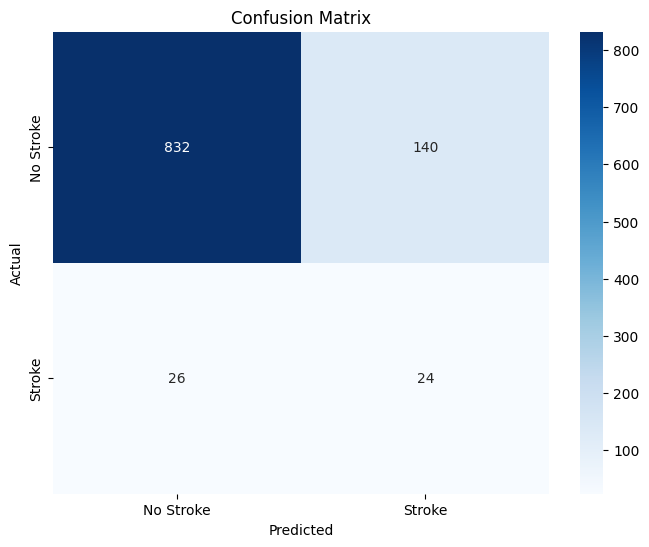

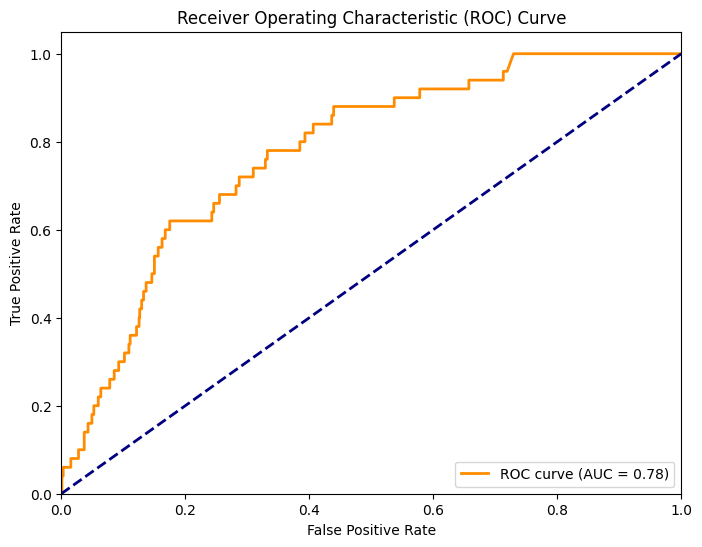

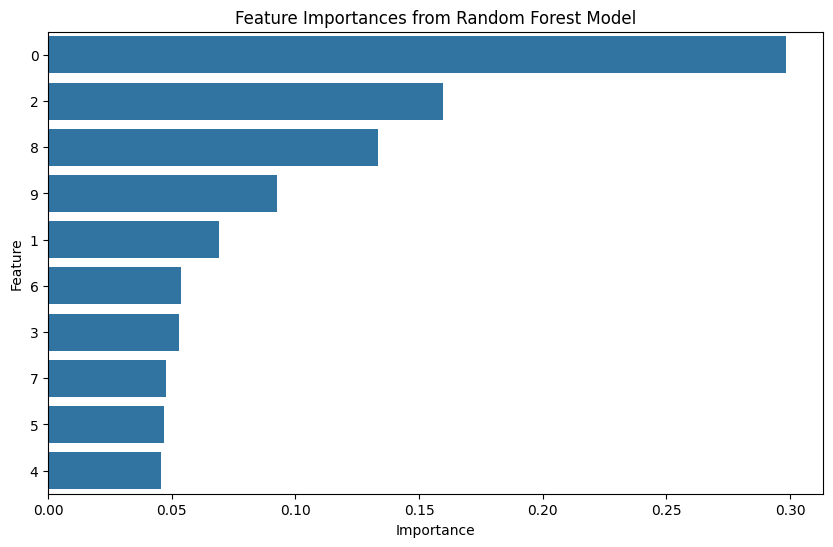

In [36]:
# Visual Representation: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visual Representation: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visual Representation: Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Model')
plt.show()

Dataset Head:
          0         1         2         3         4         5         6  \
0  2.305606  1.264816  0.250546 -0.430617  0.834524  0.333307  0.320894   
1  1.453986  1.647613 -0.484745  0.160239 -1.163737 -0.412336 -0.231320   
2  1.571330 -0.416363 -0.638432  0.597845  0.169697 -0.612380  0.748779   
3  1.537974  1.474840  0.641771  0.057266  0.514872  0.671681 -0.587822   
4  1.642192  1.709071 -1.520156  0.258872 -1.103096 -0.424797 -0.188216   

          7         8         9  stroke  
0 -0.643058 -0.062396 -0.212238       1  
1  0.114952  0.208955 -0.247852       1  
2  0.043821 -0.296528 -0.280570       1  
3  0.692612  0.170372 -0.125929       1  
4  0.153761 -0.201548  0.639121       1  

Class distribution after resampling:
stroke
1    3738
0    3171
Name: count, dtype: int64

Using precomputed best hyperparameters: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, class_weight=balanced

Training the model...


Model Training Progress: 100%|██████████| 100/100 [00:14<00:00,  7.04it/s]



Test Set Evaluation:
Accuracy: 0.837573385518591
Precision: 0.14634146341463414
Recall: 0.48
F1 Score: 0.22429906542056074
ROC AUC Score: 0.7774485596707819

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.15      0.48      0.22        50

    accuracy                           0.84      1022
   macro avg       0.56      0.67      0.57      1022
weighted avg       0.93      0.84      0.88      1022



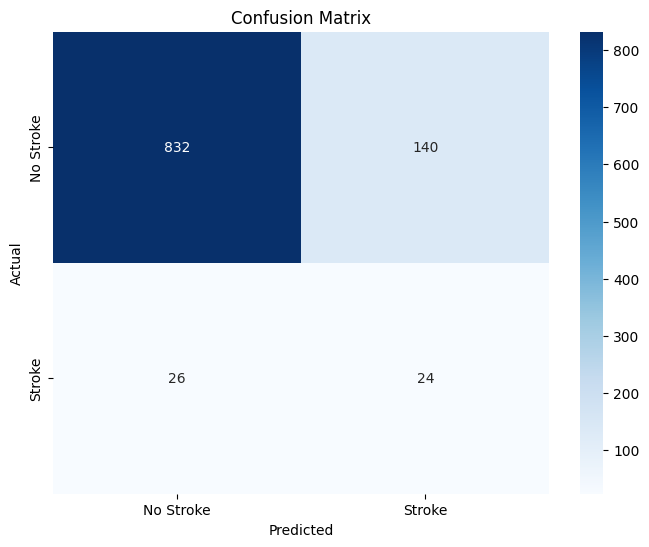


Trained model saved as: trained_random_forest_model.pkl


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score)
from imblearn.combine import SMOTEENN
import joblib
from tqdm import tqdm

# Load the preprocessed PCA dataset
df = pd.read_csv("preprocessed_stroke_data.csv")
print("Dataset Head:")
print(df.head())

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)
print("\nClass distribution after resampling:")
print(y_train_res.value_counts())

# Use precomputed best hyperparameters for demo
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5,
                                       min_samples_leaf=2, bootstrap=True, class_weight='balanced',
                                       random_state=42)
print("\nUsing precomputed best hyperparameters: n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, class_weight=balanced")

# Train the model with progress bar
print("\nTraining the model...")
with tqdm(total=100, desc="Model Training Progress") as pbar:
    best_rf_model.fit(X_train_res, y_train_res)
    for _ in range(100):
        pbar.update(1)

# Predict on test set
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluation Metrics
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize Confusion Matrix for EDA
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the trained model
model_filename = 'trained_random_forest_model.pkl'
joblib.dump(best_rf_model, model_filename)
print(f"\nTrained model saved as: {model_filename}")